<a href="https://colab.research.google.com/github/MarlonLLaguento/CC219-TP-TF-2024-1--CC92/blob/main/TF_Aplica_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fake_data = pd.read_csv('/content/drive/MyDrive/Aplicaciones de Data Science/TF/fake_reviews_dataset.csv')

In [4]:
fake_data.head(5)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [5]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [6]:
fake_data.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_tokens)

In [10]:
fake_data['clean_text'] = fake_data['text_'].apply(clean_text)

In [11]:
fake_data.head()

,category,rating,label,text_,clean_text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love well made sturdy comfortable love pretty
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love great upgrade original mine couple years
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information use great product price
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,nice set good quality set two months


In [12]:
fake_data['length'] = fake_data['clean_text'].apply(len)
fake_data.head()

,category,rating,label,text_,clean_text,length
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love well made sturdy comfortable love pretty,45
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love great upgrade original mine couple years,45
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow,39
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information use great product price,43
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,nice set good quality set two months,36


In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

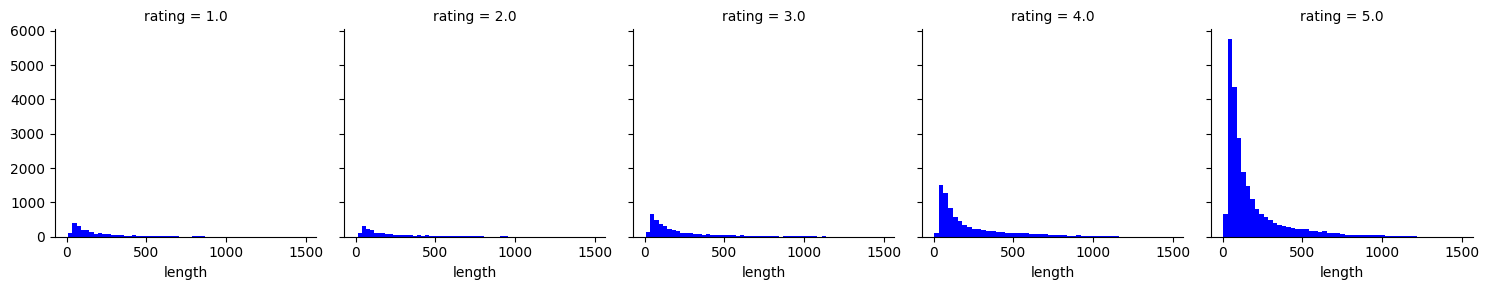

In [14]:
graph = sns.FacetGrid(data=fake_data,col='rating')
graph.map(plt.hist,'length',bins=50,color='blue')

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [16]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
sia = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):
    score = sia.polarity_scores(text)
    return score['compound']

fake_data['sentiment'] = fake_data['clean_text'].apply(get_sentiment_vader)
print(fake_data.head())

             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  \
0  Love this!  Well made, sturdy, and very comfor...   
1  love it, a great upgrade from the original.  I...   
2  This pillow saved my back. I love the look and...   
3  Missing information on how to use it, but it i...   
4  Very nice set. Good quality. We have had the s...   

                                      clean_text  length  sentiment  
0  love well made sturdy comfortable love pretty      45     0.9517  
1  love great upgrade original mine couple years      45     0.8910  
2        pillow saved back love look feel pillow      39     0.7906  
3    missing information use great product price      43     0.4404  
4           nice set good quality set two months      36     0.6908  


In [18]:
fake_data.to_csv('/content/drive/MyDrive/Aplicaciones de Data Science/TF/fake_reviews_with_sentiment.csv', index=False)

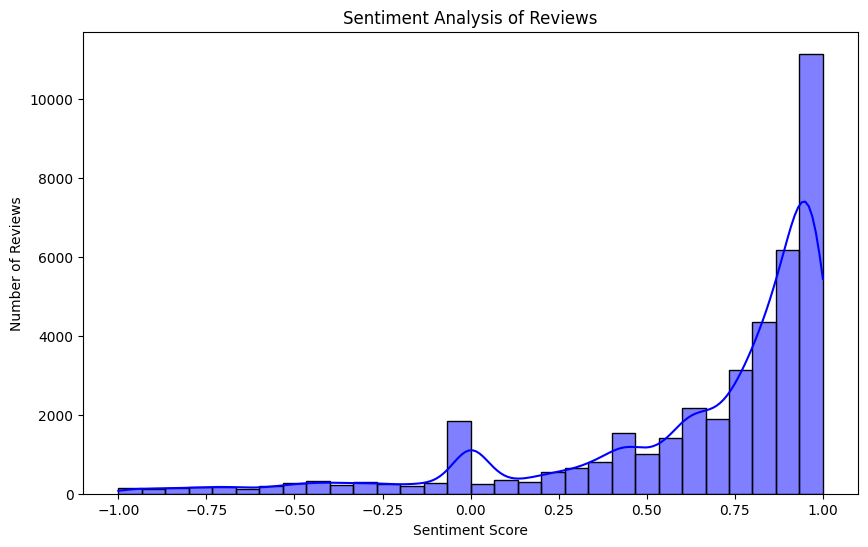

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(fake_data['sentiment'], bins=30, kde=True, color='blue')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis of Reviews')
plt.show()

In [20]:
fake_data['label'].replace({'CG': 1, 'OR': 0}, inplace=True)

In [21]:
fake_data.head()

,category,rating,label,text_,clean_text,length,sentiment
0,Home_and_Kitchen_5,5.0,1,"Love this! Well made, sturdy, and very comfor...",love well made sturdy comfortable love pretty,45,0.9517
1,Home_and_Kitchen_5,5.0,1,"love it, a great upgrade from the original. I...",love great upgrade original mine couple years,45,0.8910
2,Home_and_Kitchen_5,5.0,1,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow,39,0.7906
3,Home_and_Kitchen_5,1.0,1,"Missing information on how to use it, but it i...",missing information use great product price,43,0.4404
4,Home_and_Kitchen_5,5.0,1,Very nice set. Good quality. We have had the s...,nice set good quality set two months,36,0.6908


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

In [23]:
X_text = fake_data['clean_text']
X_sentiment = fake_data['sentiment']
X_rating = fake_data['rating']
y = fake_data['label']

In [23]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [24]:
X_train_text, X_test_text, X_train_sentiment, X_test_sentiment, X_train_rating, X_test_rating, y_train, y_test = train_test_split(
    X_text, X_sentiment, X_rating, y, test_size=0.2, random_state=42)

In [25]:
vectorizer = TfidfVectorizer()
X_train_text_vectors = vectorizer.fit_transform(X_train_text)
X_test_text_vectors = vectorizer.transform(X_test_text)

In [26]:
scaler = StandardScaler()
X_train_sentiment_scaled = scaler.fit_transform(X_train_sentiment.values.reshape(-1, 1))
X_test_sentiment_scaled = scaler.transform(X_test_sentiment.values.reshape(-1, 1))
X_train_rating_scaled = scaler.fit_transform(X_train_rating.values.reshape(-1, 1))
X_test_rating_scaled = scaler.transform(X_test_rating.values.reshape(-1, 1))

In [27]:
X_train_combined = hstack([X_train_text_vectors, X_train_sentiment_scaled, X_train_rating_scaled])
X_test_combined = hstack([X_test_text_vectors, X_test_sentiment_scaled, X_test_rating_scaled])

In [28]:
model = SVC(kernel='linear')
model.fit(X_train_combined, y_train)

SVC(kernel='linear')

In [29]:
y_pred = model.predict(X_test_combined)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.882403858043774
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      4071
           1       0.89      0.87      0.88      4016

    accuracy                           0.88      8087
   macro avg       0.88      0.88      0.88      8087
weighted avg       0.88      0.88      0.88      8087



In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

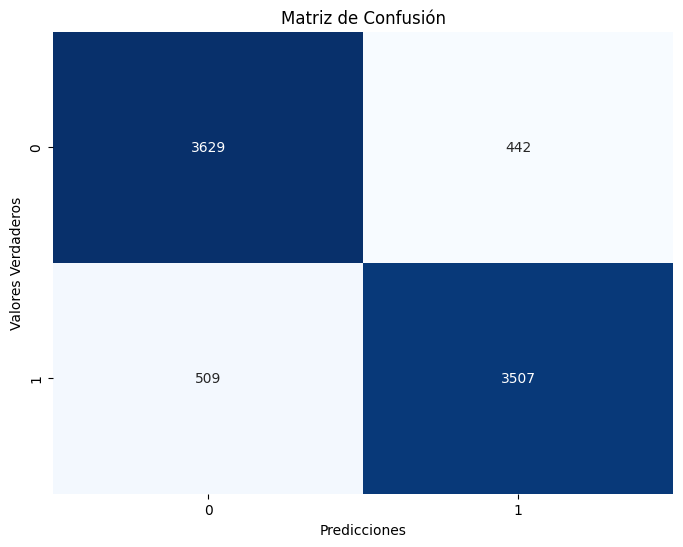

In [31]:
# Asumiendo que ya tienes 'y_test' y 'y_pred' de tu modelo SVM

# Matriz de Confusión
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


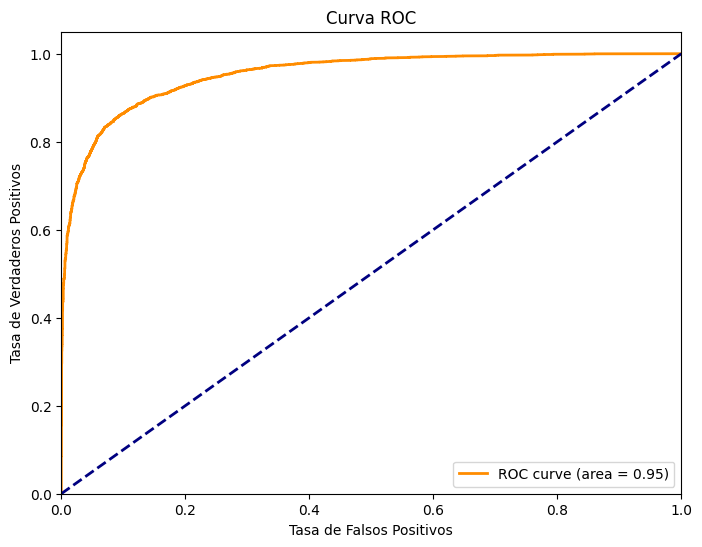

In [32]:

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test_combined))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [33]:
def predecir_resena(texto_resena, vectorizer, model, scaler, sentimiento, calificacion):
    texto_vectorizado = vectorizer.transform([texto_resena])

    sentimiento_escalado = scaler.transform([[sentimiento]])
    calificacion_escalada = scaler.transform([[calificacion]])

    caracteristicas_combinadas = hstack([texto_vectorizado, sentimiento_escalado, calificacion_escalada])

    prediccion = model.predict(caracteristicas_combinadas)

    if prediccion[0] == 1:
        return "La reseña parece ser falsa."
    else:
        return "La reseña parece ser verdadera."

In [36]:
resena = input("Escribe una reseña: ")
cali = float(input("Calificación: "))
resena_clean = clean_text(resena)
sentiment = get_sentiment_vader(resena_clean)

Escribe una reseña: It was terrible!
Calificación: 1


In [37]:
resultado = predecir_resena(resena_clean, vectorizer, model, scaler, sentiment, cali)
print(resultado)

La reseña parece ser verdadera.


In [51]:
from joblib import dump, load

dump(model, '/content/drive/MyDrive/Aplicaciones de Data Science/TF/modelo_svm.joblib')

#modelo_cargado = load('modelo_svm.joblib')

FileNotFoundError: [Errno 2] No such file or directory: 'modelo_svm.joblib'

#RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [39]:
vectorizer_rf = TfidfVectorizer()

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
        ('txt', vectorizer_rf, 'clean_text'),
        ('num', scaler, ['sentiment', 'rating'])
    ])

In [41]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [42]:
X_rf = fake_data[['clean_text', 'sentiment', 'rating']]
y_rf = fake_data['label']

In [43]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

In [44]:
pipeline.fit(X_train_rf, y_train_rf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('txt', TfidfVectorizer(),
                                                  'clean_text'),
                                                 ('num', StandardScaler(),
                                                  ['sentiment', 'rating'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [45]:
predictions_rf = pipeline.predict(X_test_rf)
print("Accuracy:", accuracy_score(y_test_rf, predictions_rf))
print("Classification Report:\n", classification_report(y_test_rf, predictions_rf))

Accuracy: 0.8591096455070074
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85      6064
           1       0.84      0.89      0.86      6066

    accuracy                           0.86     12130
   macro avg       0.86      0.86      0.86     12130
weighted avg       0.86      0.86      0.86     12130



In [46]:
print(classification_report(y_test_rf, predictions_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test_rf, predictions_rf))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      6064
           1       0.84      0.89      0.86      6066

    accuracy                           0.86     12130
   macro avg       0.86      0.86      0.86     12130
weighted avg       0.86      0.86      0.86     12130

Matriz de Confusión:
 [[5010 1054]
 [ 655 5411]]


In [47]:
def predict_review_rf(new_text, sentiment, rating, pipeline):
    new_data = pd.DataFrame({
        'clean_text': [new_text],
        'sentiment': [sentiment],
        'rating': [rating]
    })
    prediction = pipeline.predict(new_data)

    return 'Falsa' if prediction == 0 else 'Verdadera'

In [48]:
resena = input("Escribe una reseña: ")
cali = float(input("Calificación: "))
resena_clean = clean_text(resena)
sentiment = get_sentiment_vader(resena_clean)

Escribe una reseña: It was terrible!
Calificación: 5


In [49]:
resultado = predict_review_rf(resena_clean, sentiment, cali, pipeline)
print("La reseña es:", resultado)

La reseña es: Falsa


In [52]:
dump(pipeline, '/content/drive/MyDrive/Aplicaciones de Data Science/TF/modelo_rf.joblib')

['/content/drive/MyDrive/Aplicaciones de Data Science/TF/modelo_rf.joblib']

#NAYVE BAYES

In [50]:
from sklearn.naive_bayes import MultinomialNB